<a href="https://colab.research.google.com/github/SushruthDt/Sushrutha_DATA606/blob/main/%5CIndividual%20Project%5CPart%20B%5CPartB_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on G20 countries from 2000 to 2018, If they are really helping to save earth.
---------------
By : Sushrutha DT ID : MM73053

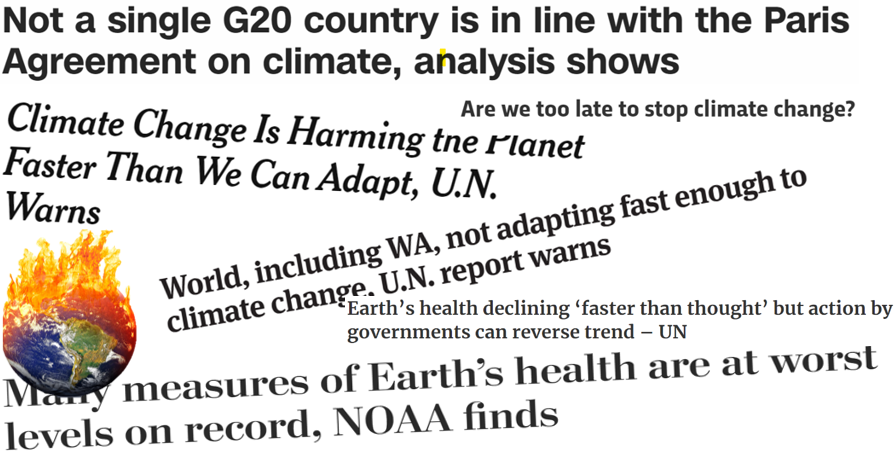


## Abstract
----------------
Climate change risks are developing at such a rapid rate that they may soon outstrip both nature's and humans' ability to adapt unless greenhouse gas emissions are drastically reduced. Many parts of the world may soon reach their limitations in terms of how much they can adapt to a changing climate if temperatures continue to rise. Since the 19th century, people have pumped heat-trapping gases into the atmosphere by burning coal, oil, and gas for energy and chopping down forests, causing global temperatures to rise by an average of 1.1 degrees Celsius, or 2 degrees Fahrenheit. Natural ecosystems vary greatly in how much and for how long carbon is retained, depending on the interplay between climate, soils, plants, and previous disturbance in a given location. As a result, initiatives to maintain the integrity of forest ecosystems or expand their area will have a favorable impact on greenhouse gas mitigation in general. Despite scientists' warnings that drastic reductions in greenhouse gas emissions are required now, none of the world's largest economies, including the whole G20, have a climate strategy that meets their commitments under the Paris Agreement. In this Paper I will highlights How these countries have been doing with respect to expansion of Agricultural cover, Forest cover and Greenhouse gas emission, which one of main parameters to detect if the countries are moving in right direction to be sustainable.

## Reason for my research
--------------------------------
My anxities towards earths health since I was a Kid . I am member of UMBC environmental club, every week we scout the exteriors of campus for non-bio degreables and collect as part of cleanup . Having known that every year, the earth's health is deteriotating and the countries are not taking any drastic steps to improve sustainablity

## Research Questions that will be answered
-----------------------
- Have countires improved forest cover or not? Which countries are lagging ?
- Which countries have expanded their land into agricultural cover ?
- Which countries have been emitting greenhouse gases above threshold?
- How are are the above issues correlated to increase in greenhouse gases?  

### ***1.0 Forest Cover analysis with respect to G20 countires.***

In order to curb the green house emissions, It is essential that the countries increase Forest cover.




In [ ]:
import pandas as pd
import plotly
import plotly.express as px

config_dict = {'editable': True, 
                'edits' : {'titleText': True, 
                           "axisTitleText": True,
                           'annotationText' : True, 
                           'annotationPosition' : True,
                           "shapePosition": True,
                           'legendPosition' : True,
                           'legendText' : False},
               'modeBarButtonsToAdd':['drawline',
                                      'drawopenpath',
                                      'drawclosedpath',
                                      'drawcircle',
                                      'drawrect',
                                      'eraseshape'],
               'toImageButtonOptions' : {'scale' : 2}
              }    


data = "https://raw.githubusercontent.com/SushruthDt/Sushruth_data690/main/Individual%20Project/Part%20B/Data/wdi_data.csv"
data = pd.read_csv(data)
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()


,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
0,2000,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
1,2001,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
2,2002,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
3,2003,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
4,2004,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA


In [ ]:
G20 = [] # creating G20 list
G20 = ['Argentina','Australia','Brazil','Canada','China','France','Germany','India','Indonesia','Italy','Japan','South Korea','Mexico','Russia','Saudi Arabia','South Africa','Turkey','United Kingdom','United States','European Union']

data_2020 = data[data['Year'] == 2020 ]
data_2020_g20 = data_2020[data_2020['Country Name'].isin(G20)]
data_g20 = data[data['Country Name'].isin(G20)]

data_2020_g20 = data_2020_g20.sort_values(by="value", ascending=False)
data_2020_g20.head()

,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
2044,2020,68.408779,AG.LND.FRST.ZS,JPN,Japan,East Asia & Pacific,High income,Not classified
566,2020,59.417478,AG.LND.FRST.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
1876,2020,49.071780,AG.LND.FRST.ZS,IDN,Indonesia,East Asia & Pacific,Lower middle income,IBRD
755,2020,38.695513,AG.LND.FRST.ZS,CAN,Canada,North America,High income,Not classified
4237,2020,33.866926,AG.LND.FRST.ZS,USA,United States,North America,High income,Not classified


In [ ]:
fig = px.bar(data_2020_g20, x='Country Code', y='value', color='Country Code', orientation='v',text_auto=True, labels={"value":"2020 Forest Cover Area", "Country Name":""},
    log_x=False, template=list(plotly.io.templates.keys())[5],
    title= "% Forest Cover in G20 at 2020")
fig.update_layout(showlegend=True)
fig.show()



Observation 1 -

Currently, Japan , korea and brazil has the highest forest cover %
United Kingdom,Argentina and Saudi has the least, because of their small landcover and high population density.



Below is the figure 2, a wordmap view of the forest cover, Right range color has the most forest cover as oposed to green gradient ones.





In [ ]:
fig = px.choropleth(
    data_2020_g20,
    locations= "Country Code",
    labels={"value":"%"},
    color= "value",
    height= 700,
    color_continuous_scale= "geyser",
    hover_name="Country Name",
    template=list(plotly.io.templates.keys())[5],
    title= "% Forest Cover in G20 at 2020"
)

fig.show()

Figure 3, below shows forest cover where g20 countries are grouped in terms of contients

- East Asia and Pacific has the highest and exceeding marginally compared to Europe and Central Asia.
- North America, SOuth Asia has comparitively less, because few countries represent from those respective contitnents.



In [ ]:
fig = px.sunburst(data_2020_g20, path=['Region', 'Country Name'], title= "% Forest Cover in G20 at 2020",  template=list(plotly.io.templates.keys())[5],
                  values='value')
fig.update_layout(
    margin = dict(l=2, r=2, b=2)
)
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.show()

Figure 4 below, shows the timeline of forest cover change across G20 countries .

- It is observed that Indonesia has shown downward trend in forest cover, there from 52% to 48% , that is , there has been loss of 4% between the years 2015 to 2020 respectively. This is something that the UN organisation should look up and warn them to contribute for earth health.
- Brazil forest cover has steadily reduced from 63% to 59% over the couple decades 2005 to 2020 . Similar case with argentina where
- On the other Hand, China forest cover has increased from 21% to 25% during year 2010 to 2020.



In [ ]:
fig = px.line(
    data_g20,
    x= "Year",
    y= "value",
    height= 600,
    template=list(plotly.io.templates.keys())[5], color='Country Name', orientation='v', markers=True,labels={"value":"2020 Forest Cover Area", "Year":"Year"},
    title= "% Forest Cover in G20 over the years"
)
fig.update_layout(showlegend= True)
fig.show()

### Conclusion - 
From all the above Observations, which highlights the change in forest cover over the years in a animated format, extracted from the website.

- The Indonesia slipped a position low over the years and is behind Russia.
- Forest cover of Brazil has decreased tremendosly, which is a negative sign in perspective of earths climate change, Speciaies endagerment and green house gas problem.
- China, Italy, France, India are few of the countries that have actually increased their forest cover in their land, which is good sign.

### ***B. Agriculture Cover analysis with respect to G20 countries.***

Agricultural deforestation accounts for roughly 80% of tropical deforestation, while logging is the leading cause of forest degradation. Though an exact figure for how many trees are cut down each year is difficult to come by, the estimate is between 3.5 and 7 billion. Agricultural expansion, which includes growing crops for livestock and clearing land for grazing, accounts for nearly 30% of this estimate. Hence , it is essential for mankind to make sure we adopt new methods of sustainable agriculture to avoid this crisis.



In [ ]:
data1 = "https://raw.githubusercontent.com/SushruthDt/Sushruth_data690/main/Individual%20Project/Part%20B/Data/wdi_data_AGR.csv"
data1 = pd.read_csv(data1)
data1.drop(columns=["Unnamed: 0"], inplace=True)
data_2020 = data1[data1['Year'] == 2000 ]
data_2020_g20 = data_2020[data_2020['Country Name'].isin(G20)]
data_g20 = data1[data1['Country Name'].isin(G20)]
data_2020_g20 = data_2020_g20.sort_values(by="value", ascending=False)
data_2020_g20.head()

,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
3238,2000,80.888475,AG.LND.AGRI.ZS,ZAF,South Africa,Sub-Saharan Africa,Upper middle income,IBRD
3054,2000,80.841889,AG.LND.AGRI.ZS,SAU,Saudi Arabia,Middle East & North Africa,High income,Not classified
3729,2000,70.119456,AG.LND.AGRI.ZS,GBR,United Kingdom,Europe & Central Asia,High income,Not classified
1653,2000,60.868966,AG.LND.AGRI.ZS,IND,India,South Asia,Lower middle income,IBRD
190,2000,59.288104,AG.LND.AGRI.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified


In [ ]:
fig = px.bar(data_2020_g20, x='Country Name', y='value', color='Country Code', orientation='v',text_auto=True, labels={"value":"2020 Forest Cover Area", "Country Name":""},
    log_x=False, template=list(plotly.io.templates.keys())[5],
    title= "% Forest Cover in G20 at 2000")
fig.update_layout(showlegend=True)
fig.show()


The above Figure 5, shows the line of G20 as per to know agricultural land area. Observation -

- South Africa, Saudi Arabia, United Kingdom and India are among the top G20 countires to have highest agricultural land.
- Canada, Russia and Japan have the lost % of agricultural land compared to other G20 countires.

### Conclusion 

We can explain the above hypothesis for decrease in land cover in argentina over the years because, they have been inscresing their land cover exponential over couple of decade. Argentina has climbed up the ladder in % aggriculture land.
Australia has adopted sustainable agricutlre and decreased its agriculture land and focused on increase in forest cover.
United States have signifincantly increased its agricultural cover over the years as compared to India, where the agricultural land % is the same.

-----------------------------
### ***C. Green House gas emission by G20 countries.***

Climate forcing is defined as a shift in the Earth's energy balance that results in either a warming or cooling effect over time. An increase in greenhouse gas concentrations in the atmosphere causes positive climate forcing, or warming. Between 1990 and 2019, the total warming effect of greenhouse gases added to the Earth's atmosphere by humans increased by 45 percent. The warming effect caused by carbon dioxide alone increased by 36%.

In [ ]:
data3 = "https://raw.githubusercontent.com/SushruthDt/Sushruth_data690/main/Individual%20Project/Part%20B/Data/wdi_data_CO2.csv"
data3 = pd.read_csv(data3)
data3.drop(columns=["Unnamed: 0"], inplace=True)
data_2020 = data3[data3['Year'] == 2018 ]
data_2020_g20 = data_2020[data_2020['Country Name'].isin(G20)]
data_g20 = data3[data3['Country Name'].isin(G20)]
data_2020_g20 = data_2020_g20.sort_values(by="value", ascending=False)
data_2020_g20.head()

,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
683,2018,12355240,EN.ATM.GHGT.KT.CE,CHN,China,East Asia & Pacific,Upper middle income,IBRD
3476,2018,6023620,EN.ATM.GHGT.KT.CE,USA,United States,North America,High income,Not classified
1462,2018,3374990,EN.ATM.GHGT.KT.CE,IND,India,South Asia,Lower middle income,IBRD
1614,2018,1186770,EN.ATM.GHGT.KT.CE,JPN,Japan,East Asia & Pacific,High income,Not classified
455,2018,1032640,EN.ATM.GHGT.KT.CE,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD


In [ ]:
fig = px.bar(data_2020_g20, x='Country Name', y='value', color='Country Code', orientation='v',text_auto=True, labels={"value":"2018 Forest Cover Area", "Country Name":""},
    log_x=False, template=list(plotly.io.templates.keys())[5],
    title= "% Forest Cover in G20 at 2000")
fig.update_layout(showlegend=True)
fig.show()

The video 3 above shows which G20 countires have been majorly contributing for global warming ,

- China is the only coountry who does not care about the global warming effect, as theve have been exponentially the highest contributer to green house gases.
- India being the highest populated country, is doing really well compared to china, whi is the highest emitter .
- United States is more or less in same scale of 7M kt of CO2 gases.
Brazil and Indonesia greenhouse emission has increases, as result of their agricultural Expansion and decrease in forest cover.
- Saudi Arabia has significantly moved up the spots in green house gas emittor.

In [ ]:
data1_2015 = data1[data1['Year'] == 2015 ]
data1_2015_g20 = data1_2015[data1_2015['Country Name'].isin(G20)]
data1_2015_g20.head()

,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
148,2015,54.335712,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
205,2015,45.314424,AG.LND.AGRI.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified
509,2015,28.168731,AG.LND.AGRI.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
680,2015,6.467505,AG.LND.AGRI.ZS,CAN,Canada,North America,High income,Not classified
794,2015,56.090201,AG.LND.AGRI.ZS,CHN,China,East Asia & Pacific,Upper middle income,IBRD


In [ ]:
data_2015 = data[data['Year'] == 2015 ]
data_2015_g20 = data_2015[data_2015['Country Name'].isin(G20)]
data_2015_g20.head()

,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
162,2015,10.632187,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
225,2015,17.324825,AG.LND.FRST.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified
561,2015,60.286715,AG.LND.FRST.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
750,2015,38.716438,AG.LND.FRST.ZS,CAN,Canada,North America,High income,Not classified
874,2015,22.313094,AG.LND.FRST.ZS,CHN,China,East Asia & Pacific,Upper middle income,IBRD


In [ ]:
result = pd.merge(data1_2015_g20, data_2015_g20, on=["Country Code", "Country Code"])
result.head()

,Year_x,value_x,indicator_x,Country Code,Country Name_x,Region_x,Income Group_x,Lending Type_x,Year_y,value_y,indicator_y,Country Name_y,Region_y,Income Group_y,Lending Type_y
0,2015,54.335712,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD,2015,10.632187,AG.LND.FRST.ZS,Argentina,Latin America & Caribbean,Upper middle income,IBRD
1,2015,45.314424,AG.LND.AGRI.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified,2015,17.324825,AG.LND.FRST.ZS,Australia,East Asia & Pacific,High income,Not classified
2,2015,28.168731,AG.LND.AGRI.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD,2015,60.286715,AG.LND.FRST.ZS,Brazil,Latin America & Caribbean,Upper middle income,IBRD
3,2015,6.467505,AG.LND.AGRI.ZS,CAN,Canada,North America,High income,Not classified,2015,38.716438,AG.LND.FRST.ZS,Canada,North America,High income,Not classified
4,2015,56.090201,AG.LND.AGRI.ZS,CHN,China,East Asia & Pacific,Upper middle income,IBRD,2015,22.313094,AG.LND.FRST.ZS,China,East Asia & Pacific,Upper middle income,IBRD


In [ ]:
fig = px.scatter(result, x="value_y", y="value_x",color='Country Code',  template=list(plotly.io.templates.keys())[5],labels={"value_x":"% of Forest Cover on 2015", "value_y":"% of Agricultural Land on 2015"},
)
fig.update_traces(marker_size=100)
fig.show()

the Above Figure 6 shows the correlation between greenhouse gase change with respect to Agricultre Land and Forest land cover.



# Paper Conclusion 
My study attests that there is clearly coorelation between the impact on greenhouse emission on increase or decrease of Forest area and agricultral land cover. Its about time that these top countires that they call themselves as advanced and developed countries, and they are being the main factor for earths health. Very few countries like Italy, Europe, Germany, Canada and India, are doing good and helping earth in environmental aspects. However, countries like China, Argentina, Indonesia and Brazil have significantly affected to greenhouse gases in many different ways as possible.

# References

https://www.cnn.com/2021/09/15/world/climate-pledges-insufficient-cat-intl/index.html

https://www.fs.usda.gov/ccrc/topics/importance-forest-cover

https://www.nytimes.com/2022/02/28/climate/climate-change-ipcc-report.html

https://www.epa.gov/climate-indicators/greenhouse-gases#:~:text=An%20increase%20in%20the%20atmospheric,atmosphere%20increased%20by%2045%20percent.

https://news.mongabay.com/2012/09/agriculture-causes-80-of-tropical-deforestation/

